<a href="https://colab.research.google.com/github/ReynandrielPT/PM/blob/main/Tugas_Implementasi_Metode_k_NN%2C_Naive_Bayes_Decision_Tree%2C_dan_SVM_pada_problem_klasifikasi_5025231113_Reynandriel_Pramas_Thandya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, accuracy_score,
    precision_score, recall_score, f1_score,
    confusion_matrix
)


### Load Dataset

In [22]:
df = pd.read_csv('heart_disease_uci.csv')

print(">> Five sample rows:")
display(df.head())

print("\n>> Data Info:")
df.info()

print("\n>> Statistical Summary:")
display(df.describe())


>> Five sample rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



>> Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

>> Statistical Summary:


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


###  Data Cleaning

Step pengubahan nama kolom dan penghapusan kolom id

In [23]:
df.columns = [
    'id','age','origin','sex','cp','trestbps','chol','fbs','restecg',
    'thalach','exang','oldpeak','slope','ca','thal','num'
]


df = df.drop('id', axis=1)


Menangani data dengan value kosong, data categorical diubah menjadi modus, data numerical menjadi median

In [24]:
df[['ca','thal']] = df[['ca','thal']].replace('?', np.nan)

cat_cols = ['origin','sex','cp','fbs','restecg','exang','slope','thal','ca']
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

num_cols = ['age','trestbps','chol','thalach','oldpeak']
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])


Encoding dan Scaling

In [25]:
df['ca'] = df['ca'].astype(int)


le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


X = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)


scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


### Train dan Evaluasi Models


===== k-NN =====
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        75
           1       0.86      0.84      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



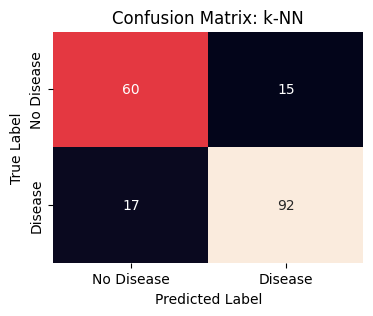


===== Naive Bayes =====
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        75
           1       0.88      0.79      0.83       109

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



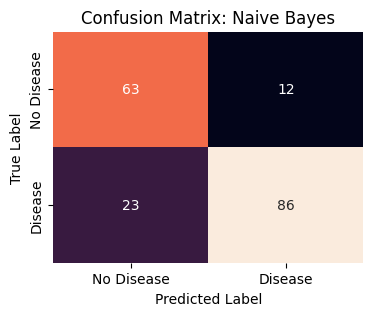


===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        75
           1       0.82      0.77      0.79       109

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



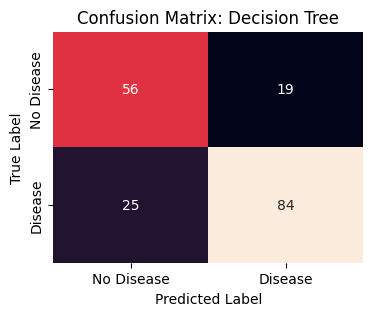


===== SVM =====
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        75
           1       0.90      0.87      0.88       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



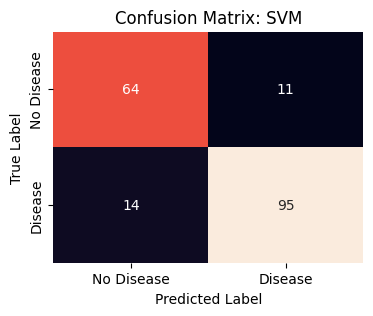


>>> Perbandingan Metrik Evaluasi <<<


,Accuracy,Precision,Recall,F1-Score
Model,,,,
k-NN,0.826087,0.859813,0.844037,0.851852
Naive Bayes,0.809783,0.877551,0.788991,0.830918
Decision Tree,0.760870,0.815534,0.770642,0.792453
SVM,0.864130,0.896226,0.871560,0.883721


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    'k-NN': KNeighborsClassifier().fit(X_train, y_train),
    'Naive Bayes': GaussianNB().fit(X_train, y_train),
    'Decision Tree': DecisionTreeClassifier(random_state=42).fit(X_train, y_train),
    'SVM': SVC(random_state=42).fit(X_train, y_train)
}

metrics = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)

    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))

    metrics.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cbar=False,
                xticklabels=['No Disease','Disease'],
                yticklabels=['No Disease','Disease'])
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


df_metrics = pd.DataFrame(metrics).set_index('Model')
print("\n>>> Perbandingan Metrik Evaluasi <<<")
display(df_metrics)
